In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
df = pd.read_csv("C:/workspace/data/seoul_PM/df_PM_pre.csv")
df

,날짜,미세먼지(PM10),초미세먼지(PM2.5),next_PM10,next_PM2.5,next_mask_need,기온(°C),강수량(mm),강수 여부,습도(%),...,풍속(16방위)_140,풍속(16방위)_160,풍속(16방위)_180,풍속(16방위)_200,풍속(16방위)_230,풍속(16방위)_250,풍속(16방위)_270,풍속(16방위)_290,풍속(16방위)_320,풍속(16방위)_340
0,2008-01-01,36.834558,13.160000,35.655399,16.006667,0,-6.337500,0.0,0,47.541667,...,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,1.075000,2.420833,0.079167,0.191667
1,2008-01-02,35.655399,16.006667,53.705927,25.015480,0,-3.720833,0.0,0,49.708333,...,0.0,0.000000,0.0000,0.050000,0.000000,0.700000,0.441667,0.783333,0.233333,0.000000
2,2008-01-03,53.705927,25.015480,78.231280,37.075943,1,0.866667,0.0,0,51.500000,...,0.0,0.000000,0.0000,0.000000,0.000000,0.254167,0.908333,0.229167,0.000000,0.104167
3,2008-01-04,78.231280,37.075943,64.480598,28.653605,0,-0.379167,0.0,0,55.583333,...,0.0,0.000000,0.0000,0.145833,0.000000,0.100000,0.720833,0.708333,0.079167,0.033333
4,2008-01-05,64.480598,28.653605,78.442576,40.808084,1,1.504167,0.0,0,60.500000,...,0.0,0.000000,0.0000,0.000000,0.062500,0.212500,0.437500,0.437500,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,2022-12-26,46.834038,34.917054,49.191594,36.051107,1,-3.979167,0.0,0,68.000000,...,0.0,0.000000,0.0000,0.058333,0.025000,0.250000,0.150000,0.108333,0.116667,0.079167
5453,2022-12-27,49.191594,36.051107,34.570833,21.232756,0,-2.641667,0.0,0,69.208333,...,0.0,0.000000,0.0000,0.000000,0.054167,0.037500,0.041667,0.562500,0.025000,0.041667
5454,2022-12-28,34.570833,21.232756,30.307906,18.484193,0,-2.916667,0.1,1,58.916667,...,0.0,0.000000,0.0000,0.000000,0.104167,0.000000,1.012500,0.766667,0.433333,0.000000
5455,2022-12-29,30.307906,18.484193,38.443462,27.576923,0,-3.295833,0.0,0,54.375000,...,0.0,0.041667,0.0000,0.087500,0.000000,0.379167,0.275000,0.475000,0.058333,0.000000


In [2]:
df = pd.get_dummies(df, columns=['강수 여부'])
df.columns

Index(['날짜', '미세먼지(PM10)', '초미세먼지(PM2.5)', 'next_PM10', 'next_PM2.5',
       'next_mask_need', '기온(°C)', '강수량(mm)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)',
       '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)', '풍속(16방위)_0',
       '풍속(16방위)_20', '풍속(16방위)_50', '풍속(16방위)_70', '풍속(16방위)_90',
       '풍속(16방위)_110', '풍속(16방위)_140', '풍속(16방위)_160', '풍속(16방위)_180',
       '풍속(16방위)_200', '풍속(16방위)_230', '풍속(16방위)_250', '풍속(16방위)_270',
       '풍속(16방위)_290', '풍속(16방위)_320', '풍속(16방위)_340', '강수 여부_0', '강수 여부_1'],
      dtype='object')

In [3]:
col_X1 = ['미세먼지(PM10)', '초미세먼지(PM2.5)', '기온(°C)', '강수량(mm)', '습도(%)']
col_X2 = list(df.columns[-18:])
col_X = col_X1 + col_X2
col_X

['미세먼지(PM10)',
 '초미세먼지(PM2.5)',
 '기온(°C)',
 '강수량(mm)',
 '습도(%)',
 '풍속(16방위)_0',
 '풍속(16방위)_20',
 '풍속(16방위)_50',
 '풍속(16방위)_70',
 '풍속(16방위)_90',
 '풍속(16방위)_110',
 '풍속(16방위)_140',
 '풍속(16방위)_160',
 '풍속(16방위)_180',
 '풍속(16방위)_200',
 '풍속(16방위)_230',
 '풍속(16방위)_250',
 '풍속(16방위)_270',
 '풍속(16방위)_290',
 '풍속(16방위)_320',
 '풍속(16방위)_340',
 '강수 여부_0',
 '강수 여부_1']

In [4]:
X = df[col_X]
y = df['next_mask_need']

In [5]:
X

,미세먼지(PM10),초미세먼지(PM2.5),기온(°C),강수량(mm),습도(%),풍속(16방위)_0,풍속(16방위)_20,풍속(16방위)_50,풍속(16방위)_70,풍속(16방위)_90,...,풍속(16방위)_180,풍속(16방위)_200,풍속(16방위)_230,풍속(16방위)_250,풍속(16방위)_270,풍속(16방위)_290,풍속(16방위)_320,풍속(16방위)_340,강수 여부_0,강수 여부_1
0,36.834558,13.160000,-6.337500,0.0,47.541667,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0000,0.000000,0.000000,0.000000,1.075000,2.420833,0.079167,0.191667,1,0
1,35.655399,16.006667,-3.720833,0.0,49.708333,0.008333,0.000000,0.000000,0.000000,0.0,...,0.0000,0.050000,0.000000,0.700000,0.441667,0.783333,0.233333,0.000000,1,0
2,53.705927,25.015480,0.866667,0.0,51.500000,0.012500,0.287500,0.433333,0.187500,0.0,...,0.0000,0.000000,0.000000,0.254167,0.908333,0.229167,0.000000,0.104167,1,0
3,78.231280,37.075943,-0.379167,0.0,55.583333,0.000000,0.258333,0.070833,0.000000,0.0,...,0.0000,0.145833,0.000000,0.100000,0.720833,0.708333,0.079167,0.033333,1,0
4,64.480598,28.653605,1.504167,0.0,60.500000,0.083333,0.200000,0.033333,0.000000,0.0,...,0.0000,0.000000,0.062500,0.212500,0.437500,0.437500,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,46.834038,34.917054,-3.979167,0.0,68.000000,0.066667,0.179167,0.320833,0.000000,0.0,...,0.0000,0.058333,0.025000,0.250000,0.150000,0.108333,0.116667,0.079167,1,0
5453,49.191594,36.051107,-2.641667,0.0,69.208333,0.066667,0.570833,0.366667,0.000000,0.0,...,0.0000,0.000000,0.054167,0.037500,0.041667,0.562500,0.025000,0.041667,1,0
5454,34.570833,21.232756,-2.916667,0.1,58.916667,0.000000,0.075000,0.033333,0.033333,0.0,...,0.0000,0.000000,0.104167,0.000000,1.012500,0.766667,0.433333,0.000000,0,1
5455,30.307906,18.484193,-3.295833,0.0,54.375000,0.183333,0.000000,0.225000,0.000000,0.0,...,0.0000,0.087500,0.000000,0.379167,0.275000,0.475000,0.058333,0.000000,1,0


In [6]:
y

0       0
1       0
2       1
3       0
4       1
       ..
5452    1
5453    0
5454    0
5455    0
5456    0
Name: next_mask_need, Length: 5457, dtype: int64

In [7]:
y.value_counts()

0    4663
1     794
Name: next_mask_need, dtype: int64

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='next_mask_need', ylabel='count'>

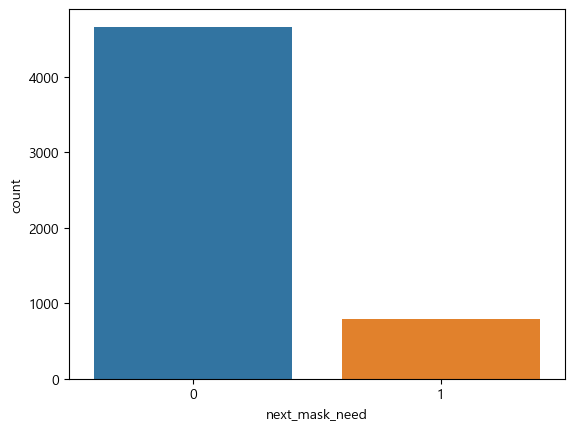

In [8]:
sns.countplot(y)

In [9]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=2).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=col_X)
y_samp = pd.DataFrame(data=y_sample, columns=['next_mask_need'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
y_samp.value_counts()

next_mask_need
0                 794
1                 794
dtype: int64

In [10]:
X = X_samp
y = y_samp

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=col_X)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=col_X)

In [13]:
X_train_scaled

,미세먼지(PM10),초미세먼지(PM2.5),기온(°C),강수량(mm),습도(%),풍속(16방위)_0,풍속(16방위)_20,풍속(16방위)_50,풍속(16방위)_70,풍속(16방위)_90,...,풍속(16방위)_180,풍속(16방위)_200,풍속(16방위)_230,풍속(16방위)_250,풍속(16방위)_270,풍속(16방위)_290,풍속(16방위)_320,풍속(16방위)_340,강수 여부_0,강수 여부_1
0,1.259434,0.933777,-0.912875,-0.230953,-0.302986,-0.468829,-0.474012,-0.470926,-0.395589,-0.390045,...,0.509049,0.114389,2.301344,2.186378,-0.386073,-0.855118,-0.561545,-0.395827,0.559571,-0.559571
1,0.529080,0.284651,-0.653888,-0.230953,-0.451897,-0.468829,-0.638673,0.008080,1.657053,-0.390045,...,-0.401840,0.942506,0.208637,-0.365507,-0.562337,-0.224791,-0.561545,-0.395827,0.559571,-0.559571
2,0.116585,0.386740,1.362395,-0.230953,0.980626,1.201007,-0.408148,-0.665117,-0.474234,-0.390045,...,-0.401840,2.305448,1.327780,1.788378,-0.148115,-0.571928,-0.059844,-0.395827,0.559571,-0.559571
3,1.205636,1.479615,1.727737,-0.230953,1.394598,-0.468829,-0.638673,-0.665117,-0.474234,-0.390045,...,-0.401840,2.874779,5.713367,0.664612,-0.923679,-0.855118,-0.561545,-0.395827,0.559571,-0.559571
4,0.049741,-0.204313,-1.605401,-0.230953,-1.422796,0.052995,1.106732,0.008080,-0.332673,-0.390045,...,0.562631,-0.437689,-0.473768,0.535847,1.032857,-0.169980,-0.561545,-0.395827,0.559571,-0.559571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,1.009992,0.786047,0.914648,-0.230953,0.909149,0.209542,0.448089,0.448247,-0.230434,-0.390045,...,-0.401840,-0.437689,0.235933,-0.704978,0.301359,-0.571928,-0.189315,-0.395827,0.559571,-0.559571
1187,-1.288275,-1.186739,1.326673,-0.230953,0.036531,1.357554,-0.375215,-0.522710,1.366065,-0.390045,...,-0.401840,0.114389,-0.200806,-0.119683,-0.923679,-0.434900,-0.124580,-0.395827,0.559571,-0.559571
1188,0.921111,0.887187,-1.016794,-0.221404,0.066313,-0.260099,0.217564,-0.380303,-0.474234,-0.390045,...,0.455467,-0.437689,-0.346386,0.664612,0.786086,0.149751,1.623284,-0.395827,-1.787082,1.787082
1189,0.858306,0.461443,-0.513028,-0.230953,0.274788,-0.468829,-0.638673,-0.665117,-0.474234,-0.390045,...,8.439145,1.287554,0.945634,3.754969,0.045775,-0.855118,-0.027476,0.648764,0.559571,-0.559571


In [14]:
X_test_scaled

,미세먼지(PM10),초미세먼지(PM2.5),기온(°C),강수량(mm),습도(%),풍속(16방위)_0,풍속(16방위)_20,풍속(16방위)_50,풍속(16방위)_70,풍속(16방위)_90,...,풍속(16방위)_180,풍속(16방위)_200,풍속(16방위)_230,풍속(16방위)_250,풍속(16방위)_270,풍속(16방위)_290,풍속(16방위)_320,풍속(16방위)_340,강수 여부_0,강수 여부_1
0,0.800386,0.407956,-0.957121,-0.230953,0.179485,-0.155735,0.777411,-0.470926,-0.474234,-0.390045,...,-0.401840,0.597457,0.199538,0.477318,-0.342006,-0.772902,-0.156947,-0.395827,0.559571,-0.559571
1,1.938922,1.299594,-0.189903,-0.230953,0.980626,0.261724,3.905967,-0.108435,-0.364131,-0.390045,...,-0.401840,-0.437689,-0.255398,-0.704978,-0.491831,0.076670,-0.561545,-0.395827,0.559571,-0.559571
2,-0.791918,-1.207976,-1.308256,-0.230953,-1.503208,0.627001,2.983866,1.535718,-0.198976,0.716706,...,-0.401840,-0.437689,-0.473768,-0.704978,-0.694535,-0.645009,-0.367338,-0.395827,0.559571,-0.559571
3,1.688815,1.694344,0.791243,-0.230953,-0.317877,-0.103552,-0.441080,-0.665117,-0.395589,-0.390045,...,2.491573,2.805769,0.117649,0.676318,0.548129,-0.855118,-0.561545,-0.395827,0.559571,-0.559571
4,0.161319,0.025289,-0.651858,-0.230953,1.171232,-0.468829,2.852138,0.849575,-0.474234,-0.390045,...,0.937703,-0.437689,1.728124,-0.564507,-0.809107,-0.855118,-0.561545,-0.395827,0.559571,-0.559571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1.605257,1.865295,-1.145882,-0.230953,0.632174,1.566284,0.612750,-0.574494,-0.474234,-0.390045,...,-0.401840,-0.437689,-0.473768,-0.107977,-0.148115,-0.453171,-0.286419,0.387616,0.559571,-0.559571
393,0.813275,0.862414,-1.130456,-0.230953,0.584523,-0.312282,2.424019,0.551815,-0.474234,-0.390045,...,2.384410,0.925253,-0.373682,-0.482566,-0.297940,-0.416630,-0.561545,-0.395827,0.559571,-0.559571
394,1.092535,0.957429,-0.778104,-0.230953,0.935953,0.835731,1.600715,1.017875,2.073872,0.433584,...,-0.401840,-0.437689,-0.473768,-0.704978,-0.676909,-0.855118,-0.302603,-0.395827,0.559571,-0.559571
395,0.796318,0.041461,0.701532,-0.230953,-0.827153,-0.155735,-0.111758,-0.302626,-0.191111,-0.390045,...,-0.401840,-0.437689,-0.473768,-0.704978,0.257293,1.118080,0.927375,-0.395827,0.559571,-0.559571


In [15]:
# 여러 모델들을 비교하기 위한 리스트 생성
models = []
model_scores = []

In [16]:
# 로지스틱 모델
from sklearn.linear_model import LogisticRegression
iter = []
score = []
for i in range(100, 10000, 100):
    logit = LogisticRegression(random_state=2, max_iter=i)
    logit.fit(X_train_scaled, y_train)
    iter.append(i)
    score.append(logit.score(X_test_scaled, y_test))
max_iter = iter[np.argmax(score)]
max_score = max(score)
print(max_iter)
print(max_score)
models.append("Logit")
model_scores.append(max_score)

c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

100
0.7934508816120907


c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

In [17]:
# 의사결정나무 모델
from sklearn.tree import DecisionTreeClassifier
depth = []
score = []
for i in range(1, 11):
    tree = DecisionTreeClassifier(random_state=2, max_depth=i)
    tree.fit(X_train_scaled, y_train)
    depth.append(i)
    score.append(tree.score(X_test_scaled, y_test))
max_depth = depth[np.argmax(score)]
max_score = max(score)
print(max_depth)
print(max_score)
models.append("tree")
model_scores.append(max_score)

3
0.7783375314861462


In [18]:
# 랜덤포레스트 모델
from sklearn.ensemble import RandomForestClassifier
estimator = []
score = []
for i in range(100, 2001, 100):
    forest = RandomForestClassifier(random_state=2, n_estimators=i)
    forest.fit(X_train_scaled, y_train)
    estimator.append(i)
    score.append(forest.score(X_test_scaled, y_test))
max_estimator = estimator[np.argmax(score)]
max_score = max(score)
print(max_estimator)
print(max_score)
models.append("forest")
model_scores.append(max_score)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_10060\1072927211.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train_scaled, y_train)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_10060\1072927211.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train_scaled, y_train)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_10060\1072927211.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train_scaled, y_train)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_10060\1072927211.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rav

1000
0.801007556675063


In [19]:
# KNN 모델
from sklearn.neighbors import KNeighborsClassifier
neighbor = []
score = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    neighbor.append(i)
    score.append(knn.score(X_test_scaled, y_test))
max_neighbor = neighbor[np.argmax(score)]
max_score = max(score)
print(max_neighbor)
print(max_score)
models.append("KNN")
model_scores.append(max_score)

c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

8
0.7884130982367759


c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
# MLP 모델
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=2)
mlp.fit(X_train_scaled, y_train)
score = mlp.score(X_test_scaled, y_test)
print(score)
models.append("MLP")
model_scores.append(score)

c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.783375314861461


c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
# SVM 모델
from sklearn.svm import SVC
C_value = [0.01, 0.1, 1, 10, 100]
g_value = [0.0001, 0.001, 0.01, 0.1, 1]
score = []
for c in C_value:
    for g in g_value:
        svm = SVC(random_state=2, C=c, gamma=g)
        svm.fit(X_train_scaled, y_train)
        score.append([c, g, svm.score(X_test_scaled, y_test)])
score = np.array(score)
idx = np.argmax(score[:,2])
max_score = np.max(score[:,2])
print(score[idx])
models.append("SVM")
model_scores.append(max_score)

c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[0.1        0.01       0.79848866]


c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
# keras 모델
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64,input_shape=(X.shape[1],),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
hist = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
38/38 [==============================] - 1s 4ms/step - loss: 0.5835 - accuracy: 0.7045
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4609 - accuracy: 0.7909
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4244 - accuracy: 0.8010
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4114 - accuracy: 0.8178
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4000 - accuracy: 0.8153
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 0.3918 - accuracy: 0.8220
Epoch 7/100
38/38 [==============================] - 0s 4ms/step - loss: 0.3865 - accuracy: 0.8237
Epoch 8/100
38/38 [==============================] - 0s 4ms/step - loss: 0.3778 - accuracy: 0.8270
Epoch 9/100
38/38 [==============================] - 0s 5ms/step - loss: 0.3711 - accuracy: 0.8304
Epoch 10/100
38/38 [==============================] - 0s 4ms/step - loss: 0.3651 - accuracy: 0.8388
Epoch 11/

In [24]:
loss, score = model.evaluate(X_test_scaled,
                             y_test, verbose=0)
print(score)
models.append("DNN")
model_scores.append(score)

0.7657430768013


In [25]:
models

['Logit', 'tree', 'forest', 'KNN', 'MLP', 'SVM', 'DNN']

In [26]:
model_scores = np.array(model_scores)
max_score = np.max(model_scores)
idx_max = np.argmax(model_scores)

print(models[idx_max])
print(max_score)

forest
0.801007556675063


In [ ]:
# 최종 모델 선정 : 랜덤포레스트 모델
# n_estimators = 1000

In [27]:
# 스케일러, 모델 저장
import joblib
final_model = RandomForestClassifier(random_state=2, n_estimators=1000)
final_model.fit(X_train_scaled, y_train)
# joblib.dump(scaler, 'C:/PM_predict/scaler.sav')
# joblib.dump(final_model, 'C:/PM_predict/final.model')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_10060\3830684533.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_model.fit(X_train_scaled, y_train)


['C:/PM_predict/final.model']

In [28]:
# 변수 정보 기억
col_X

['미세먼지(PM10)',
 '초미세먼지(PM2.5)',
 '기온(°C)',
 '강수량(mm)',
 '습도(%)',
 '풍속(16방위)_0',
 '풍속(16방위)_20',
 '풍속(16방위)_50',
 '풍속(16방위)_70',
 '풍속(16방위)_90',
 '풍속(16방위)_110',
 '풍속(16방위)_140',
 '풍속(16방위)_160',
 '풍속(16방위)_180',
 '풍속(16방위)_200',
 '풍속(16방위)_230',
 '풍속(16방위)_250',
 '풍속(16방위)_270',
 '풍속(16방위)_290',
 '풍속(16방위)_320',
 '풍속(16방위)_340',
 '강수 여부_0',
 '강수 여부_1']